In [1]:
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
plt.rc('figure', max_open_warning = 0)


# Data preparation

In [ ]:
df = pd.read_excel ('Ian_CD31805.05.2022._Fatma.xlsx')

df=df.fillna(0)
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns = {"rejet_aigu_cellulaire_dans_l'année":'rejet_aigu_cellulaire_dans_lannée'})

df['date_de_rejet_aigu_cellulaire']=pd.factorize(df['date_de_rejet_aigu_cellulaire'])[0]
df['grade_RAC']=pd.factorize(df['grade_RAC'])[0]
df['date_de_TP']=pd.factorize(df['date_de_TP'])[0]


df_scale=pd.DataFrame(StandardScaler().fit_transform(df))
df_scale.index=df.index
df_scale.columns=df.columns

point_clouds = np.asarray(
    [
       df_scale.query("rejet_aigu_cellulaire_dans_lannée == @df")[[ 'CD31_H24',
       'PaO2/FiO2_H24', 'SOFA_respiratoire_H24', 'CD31_H48', 'PaO2/FiO2_H48',
       'SOFA_respiratoire_H48', 'CD31_H72', 'PaO2/FiO2_H72',
       'SOFA_respiratoire_H72'
       ]].values
        for df in df_scale["rejet_aigu_cellulaire_dans_lannée"].unique()
    ]
)

P0 = point_clouds[0].tolist()
P1=point_clouds[1].tolist()

P0 = np.reshape(P0, (len(P0),3, 3))  
P1 = np.reshape(P1, (len(P1),3, 3))

P = np.concatenate((P0, P1), axis=0)

persistence = VietorisRipsPersistence(metric = 'euclidean',homology_dimensions=[0,1,2],n_jobs=-1,collapse_edges=True)

persistence_diagrams = persistence.fit_transform(P)

persistence_entropy = PersistenceEntropy(normalize=True)

X= persistence_entropy.fit_transform(persistence_diagrams)


y=np.zeros(40)
y[33:] = 1

In [3]:
data=df_scale.loc[:,['CD31_H24','PaO2/FiO2_H24', 'SOFA_respiratoire_H24', 'CD31_H48', 'PaO2/FiO2_H48','SOFA_respiratoire_H48',
        'CD31_H72', 'PaO2/FiO2_H72', 'SOFA_respiratoire_H72']]
data

,CD31_H24,PaO2/FiO2_H24,SOFA_respiratoire_H24,CD31_H48,PaO2/FiO2_H48,SOFA_respiratoire_H48,CD31_H72,PaO2/FiO2_H72,SOFA_respiratoire_H72
0,1.467067,-0.841760,0.693889,-0.486515,-0.728181,0.424959,-0.781483,-1.317307,0.802955
1,0.334375,-0.964677,1.405569,-0.149373,-0.437103,0.424959,-0.371089,-0.258397,-0.344124
2,1.931058,-0.938338,0.693889,-1.294867,0.339106,-0.469692,-0.543635,-0.327456,-0.344124
3,-0.037702,-0.841760,0.693889,-0.477723,-0.592345,0.424959,-0.481501,-0.810872,0.802955
4,-0.257592,-0.850540,0.693889,-0.154248,-1.155096,1.319610,-0.302770,-1.041070,0.802955
5,-0.595999,0.475205,-0.729473,-1.294867,0.678698,-0.469692,-0.711944,0.719944,-0.344124
6,0.620421,1.177586,-1.441153,0.146034,1.018289,-1.364343,0.052253,0.731454,-0.344124
7,-0.062870,0.791276,-0.729473,-0.550528,1.163828,-1.364343,-0.960841,0.225018,-0.344124
8,-0.704044,-0.385212,-0.017792,-0.735183,-0.029593,-0.469692,-0.958856,0.581825,-0.344124
9,-0.575751,-0.859320,0.693889,-0.333646,-0.631155,0.424959,-0.525715,-0.143298,-0.344124


# Tsne

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.000s...
[t-SNE] Computed neighbors for 40 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 46.3320961, gradient norm = 0.6001695 (50 iterations in 0.118s)
[t-SNE] Iteration 100: error = 65.8856125, gradient norm = 0.5314996 (50 iterations in 0.035s)
[t-SNE] Iteration 150: error = 69.9280319, gradient norm = 0.4830539 (50 iterations in 0.059s)
[t-SNE] Iteration 200: error = 82.5860519, gradient norm = 0.4529227 (50 iterations in 0.119s)
[t-SNE] Iteration 250: error = 99.2680359, gradient norm = 0.2725517 (50 iterations in 0.028s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.268036
[t-SNE] Iteration 300: error = 0.8383241, gradient norm = 0.0005070 (50 iterations in 0.042s)
[t-SNE] Iteration 350: error = 0.7037804, gradient norm = 

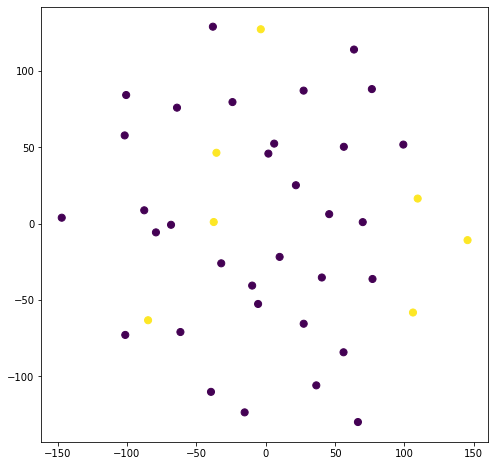

In [4]:
tsne=TSNE(n_components=3,perplexity=40,init='random' ,learning_rate='auto',verbose=2)

data_tsne=tsne.fit_transform(data)
 
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(data_tsne[:,0], data_tsne[:,1],c=y,s=50)

# Evaluation

In [5]:
import math
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing

In [6]:
def matrice_distance(data):
    d=euclidean_distances(data,data)
    d=preprocessing.normalize(d)
    return d

def estimateur(data,d,sigma):
    f=[]
    for i in range(40):
        s=0
        for j in range(40):
            s=s+math.exp(- (d[i][j]**2)*(sigma**(-1)))
        f.append(s)
    return f

def KL(a, b):
    a = np.asarray(a, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

In [7]:
A=matrice_distance(data_tsne)
B=d=matrice_distance(data)

In [8]:
sigma=[0.01,0.1,1]

f=[estimateur(data,B,sigma) for sigma in sigma]

g=[estimateur(data_tsne,A,sigma) for sigma in sigma]

In [9]:
kl=[]
for i in range(3):
    kl.append(KL(f[i],g[i]))

RMSE=[]
MSE = np.square(np.subtract(B,A)).mean()
RMSE.append(math.sqrt(MSE))

from sklearn.manifold import trustworthiness
Trust=[]
Trust.append(sklearn.manifold.trustworthiness(B,A))


In [10]:
Tab=pd.DataFrame([kl])
Tab.columns=['KL_0.01','KL_0.1','KL_1']
Tab['RMSE']=RMSE
Tab['Trust']=Trust
Tab

,KL_0.01,KL_0.1,KL_1,RMSE,Trust
0,7.787191,1.767211,0.026649,0.067074,0.529375
